In [1]:
from langgraph.graph import Graph

def function_1(input_1):
    return input_1 + " Hi "

def function_2(input_2):
    return input_2 + "there"

# Define a Langchain graph
workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('node_1', 'node_2')

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [2]:
app.invoke("Hello")

'Hello Hi there'

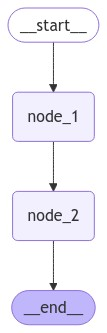

In [3]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [9]:
# text summarization using hf transformer function as node

from transformers import pipeline

pipe = pipeline("summarization", model="Falconsai/text_summarization")
# text = "Diabetes mellitus, often known simply as diabetes, is a group of common endocrine diseases characterized by sustained high blood sugar levels.[10][11] Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body becoming unresponsive to the hormone's effects.[12] Classic symptoms include thirst, polyuria, weight loss, and blurred vision. If left untreated, the disease can lead to various health complications, including disorders of the cardiovascular system, eye, kidney, and nerves.[3] Diabetes accounts for approximately 4.2 million deaths every year,[9] with an estimated 1.5 million caused by either untreated or poorly treated diabetes. The major types of diabetes are type 1 and type 2.[13] The most common treatment for type 1 is insulin replacement therapy (insulin injections), while anti-diabetic medications (such as metformin and semaglutide) and lifestyle modifications can be used to manage type 2. Gestational diabetes, a form that arises during pregnancy in some women, normally resolves shortly after delivery. As of 2021, an estimated 537 million people had diabetes worldwide accounting for 10.5% the adult population, with type 2 making up about 90 of all cases. The World Health Organization has reported that diabetes was."
# pipe(text)
def text_summarization(text:str):
    return pipe(text)[0]['summary_text']

def func_2(input2):
    return "Summary of the input text:" + input2

workflow = Graph()

workflow.add_node("node_1", text_summarization)
workflow.add_node("node_2", func_2)

workflow.add_edge('node_1', 'node_2')

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [10]:
text = "Diabetes mellitus, often known simply as diabetes, is a group of common endocrine diseases characterized by sustained high blood sugar levels.[10][11] Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body becoming unresponsive to the hormone's effects.[12] Classic symptoms include thirst, polyuria, weight loss, and blurred vision. If left untreated, the disease can lead to various health complications, including disorders of the cardiovascular system, eye, kidney, and nerves.[3] Diabetes accounts for approximately 4.2 million deaths every year,[9] with an estimated 1.5 million caused by either untreated or poorly treated diabetes. The major types of diabetes are type 1 and type 2.[13] The most common treatment for type 1 is insulin replacement therapy (insulin injections), while anti-diabetic medications (such as metformin and semaglutide) and lifestyle modifications can be used to manage type 2. Gestational diabetes, a form that arises during pregnancy in some women, normally resolves shortly after delivery. As of 2021, an estimated 537 million people had diabetes worldwide accounting for 10.5% the adult population, with type 2 making up about 90 of all cases. The World Health Organization has reported that diabetes was."

app.invoke(text)

'Summary of the input text:Diabetes mellitus is a group of common endocrine diseases characterized by sustained high blood sugar levels . Diabetes accounts for approximately 4.2 million deaths every year, with an estimated 1.5 million caused by either untreated or poorly treated diabetes .'